<div>
    <img src="images/emlyon.png" style="height:60px; float:left; padding-right:10px; margin-top:5px" />
    <span>
        <h1 style="padding-bottom:5px;"> Smart Supply Chain </h1>
        <a href="https://masters.em-lyon.com/fr/msc-in-data-science-artificial-intelligence-strategy">[Emlyon]</a> MSc in Data Science & Artificial Intelligence Strategy (DSAIS) <br/>
         January 2024, Paris | © Saeed VARASTEH
    </span>
</div>

### Part 05 - Exercises 02 : The Forecast Competition

---
<img src="images/competition.png" style="width:100px; position:absolute; top:-10px; right:0;"/>

__Objective__: Predict three months of item sales at different stores.

__Dataset description__

You are given a file named `store_sales.csv`:

    date - Date
    store - Store ID
    item - Item ID
    sales - Number of items sold at a particular store on a particular date.
    


<font size=50 color="F300FF"><b>FENG Yuekai & ZHANG Fulin</b></font> 

### Import data and modules

#### Import modules

In [492]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

#### Import data

In [493]:
sales = pd.read_csv('./data/store/store_sales.csv')
print(sales.shape)
sales.head(5)

(913000, 4)


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


## <span style="color:steelblue;">  Data Exploration  </span>


#### The data in the sales dataset are from which period?

__Hint:__ find the minimum and the maximum of the date.<br/>
__Hint:__ do not forget to convert the `date` column into datetime.

In [494]:
sales['date'] = pd.to_datetime(sales['date'])

In [495]:
start_date = sales.date.min()
end_date = sales.date.max()
print('Start Date: {}\nEnd Date: {}'.format(start_date, end_date))

Start Date: 2013-01-01 00:00:00
End Date: 2017-12-31 00:00:00


#### How many unique items and stores are in the dataset?

In [496]:
len(sales['item'].unique())


50

In [497]:
len(sales['store'].unique())

10

#### Plot average monthly sales for the item_id == 10 at store_id == 1

<Axes: title={'center': 'Average Sales of Item 10 at Store 1'}, xlabel='date'>

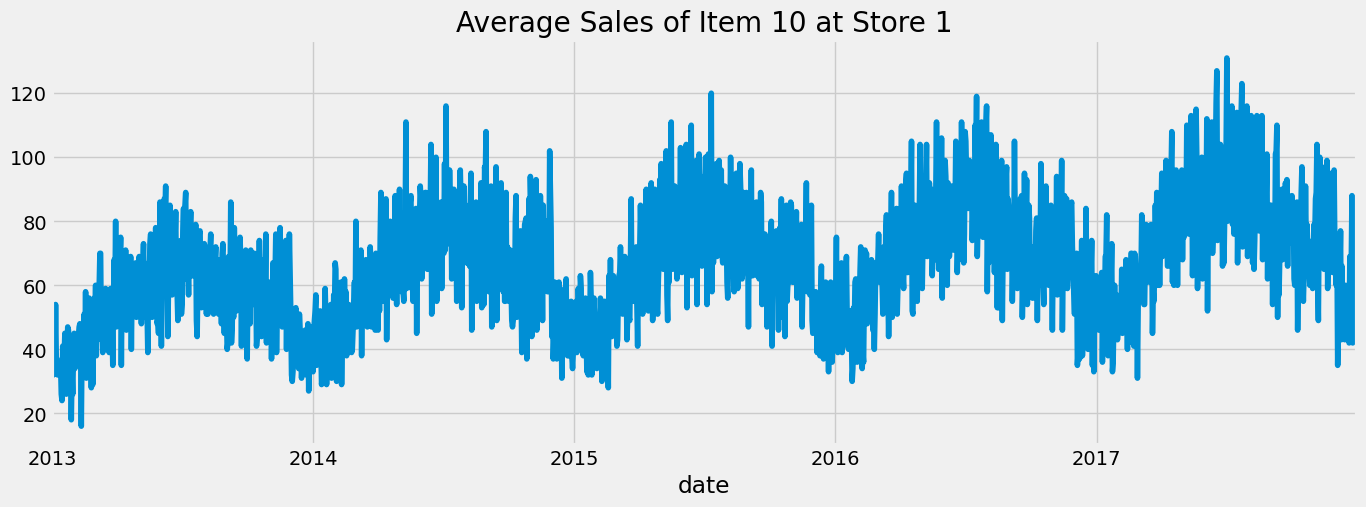

In [498]:
sales[(sales['item']==10) & (sales['store']==1)].groupby('date')['sales'].mean().plot(figsize=(15,5), title='Average Sales of Item 10 at Store 1')

---

## <span style="color:steelblue;">  Machine Learning for Time Series Forecasting  </span>


### <span style="color:DarkGray;">  Data preprocessing and Feature engineering  </span>

#### Extract some useful features (e.g. lag, rolling mean, datetime) to use in a machine learning model and them to the `sales` DataFrame.

In [499]:
# create some lag features
sales['lag_t1'] = sales.groupby(['item', 'store'])['sales'].shift(1)
sales['lag_t7'] = sales.groupby(['item', 'store'])['sales'].shift(7)
sales['lag_t14'] = sales.groupby(['item', 'store'])['sales'].shift(14)
sales['lag_t28'] = sales.groupby(['item', 'store'])['sales'].shift(28)
sales['lag_t60'] = sales.groupby(['item', 'store'])['sales'].shift(60)

In [500]:
# rolling mean features
sales['rolling_mean_t7'] = sales.groupby(['item', 'store'])['sales'].shift(1).rolling(7,closed='left').mean()
sales['rolling_mean_t28'] = sales.groupby(['item', 'store'])['sales'].shift(1).rolling(28,closed='left').mean()
sales['rolling_mean_t60'] = sales.groupby(['item', 'store'])['sales'].shift(1).rolling(60,closed='left').mean()

In [501]:
# rolling max
sales['rolling_max_t7'] = sales.groupby(['item', 'store'])['sales'].shift(1).rolling(7,closed='left').max()
sales['rolling_max_t28'] = sales.groupby(['item', 'store'])['sales'].shift(1).rolling(28,closed='left').max()
sales['rolling_max_t60'] = sales.groupby(['item', 'store'])['sales'].shift(1).rolling(60,closed='left').max()

In [502]:
# Mean absolute deviation
# def calculate_mad(series):
#     return abs(series - series.mean()).mean()

# grouped_mad = sales.groupby(['item', 'store'])['sales'].apply(calculate_mad).reset_index(name='price_mad')

# sales = sales.merge(grouped_mad, on=['item', 'store'])


In [503]:
# price delta
# sales['price_delta'] = sales.groupby(['item', 'store'])['sales'].shift(1) - sales.groupby(['item', 'store'])['sales'].shift(8)

In [504]:
# sell trend
# mean_sales = sales.groupby(['item', 'store'])['sales'].transform('mean')
# daily_sales = sales.groupby(['item', 'store', 'date'])['sales'].transform('mean')
# sales['sell_trend'] = (daily_sales - mean_sales).astype(np.float16)

In [505]:
# split the datatime
sales['quarter'] = pd.to_datetime(sales['date']).dt.quarter
sales['month'] = pd.to_datetime(sales['date']).dt.month
sales['year'] = pd.to_datetime(sales['date']).dt.year
#sales['week'] = pd.to_datetime(sales['date']).dt.isocalendar().week
#sales['week'].astype('int64')
sales['dayofyear'] = pd.to_datetime(sales['date']).dt.dayofyear
sales['dayofmonth'] = pd.to_datetime(sales['date']).dt.day

In [506]:
sales.dtypes

date                datetime64[ns]
store                        int64
item                         int64
sales                        int64
lag_t1                     float64
lag_t7                     float64
lag_t14                    float64
lag_t28                    float64
rolling_mean_t7            float64
rolling_mean_t28           float64
rolling_max_t7             float64
rolling_max_t28            float64
quarter                      int32
month                        int32
year                         int32
dayofyear                    int32
dayofmonth                   int32
dtype: object

In [507]:
sales.isna().sum()

date                    0
store                   0
item                    0
sales                   0
lag_t1                500
lag_t7               3500
lag_t14              7000
lag_t28             14000
rolling_mean_t7      3501
rolling_mean_t28    14001
rolling_max_t7       3501
rolling_max_t28     14001
quarter                 0
month                   0
year                    0
dayofyear               0
dayofmonth              0
dtype: int64

In [508]:
sales.dropna(inplace=True)

In [509]:
sales.dtypes

date                datetime64[ns]
store                        int64
item                         int64
sales                        int64
lag_t1                     float64
lag_t7                     float64
lag_t14                    float64
lag_t28                    float64
rolling_mean_t7            float64
rolling_mean_t28           float64
rolling_max_t7             float64
rolling_max_t28            float64
quarter                      int32
month                        int32
year                         int32
dayofyear                    int32
dayofmonth                   int32
dtype: object

### <span style="color:DarkGray;">  Train and test split  </span>

#### Split sales data into the __train__ and __test__ datasets. 

In [510]:
split_date = "2017-10-01"

In [511]:
train = sales.loc[sales.date < split_date].copy()
test = sales.loc[sales.date >= split_date].copy()

In [512]:
print(train.shape)
print(test.shape)

(852500, 17)
(46000, 17)


In [513]:
train

,date,store,item,sales,lag_t1,lag_t7,lag_t14,lag_t28,rolling_mean_t7,rolling_mean_t28,rolling_max_t7,rolling_max_t28,quarter,month,year,dayofyear,dayofmonth
29,2013-01-30,1,1,9,6.0,9.0,7.0,11.0,10.428571,10.714286,14.0,18.0,1,1,2013,30,30
30,2013-01-31,1,1,13,9.0,8.0,16.0,14.0,10.285714,10.464286,14.0,18.0,1,1,2013,31,31
31,2013-02-01,1,1,11,13.0,14.0,7.0,13.0,10.285714,10.392857,14.0,18.0,1,2,2013,32,1
32,2013-02-02,1,1,21,11.0,12.0,18.0,10.0,11.000000,10.357143,14.0,18.0,1,2,2013,33,2
33,2013-02-03,1,1,15,21.0,12.0,15.0,12.0,10.571429,10.285714,13.0,18.0,1,2,2013,34,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912903,2017-09-26,10,50,79,63.0,84.0,70.0,79.0,85.571429,86.928571,99.0,107.0,3,9,2017,269,26
912904,2017-09-27,10,50,80,79.0,72.0,84.0,79.0,85.857143,85.678571,99.0,107.0,3,9,2017,270,27
912905,2017-09-28,10,50,82,80.0,89.0,90.0,89.0,85.142857,85.678571,99.0,107.0,3,9,2017,271,28
912906,2017-09-29,10,50,90,82.0,97.0,94.0,96.0,86.285714,85.714286,99.0,107.0,3,9,2017,272,29


In [514]:
test

,date,store,item,sales,lag_t1,lag_t7,lag_t14,lag_t28,rolling_mean_t7,rolling_mean_t28,rolling_max_t7,rolling_max_t28,quarter,month,year,dayofyear,dayofmonth
1734,2017-10-01,1,1,21,30.0,24.0,30.0,23.0,24.428571,23.857143,37.0,37.0,4,10,2017,274,1
1735,2017-10-02,1,1,12,21.0,14.0,22.0,12.0,23.428571,24.000000,30.0,37.0,4,10,2017,275,2
1736,2017-10-03,1,1,18,12.0,18.0,21.0,26.0,23.000000,23.928571,30.0,37.0,4,10,2017,276,3
1737,2017-10-04,1,1,15,18.0,27.0,20.0,24.0,22.714286,23.928571,30.0,37.0,4,10,2017,277,4
1738,2017-10-05,1,1,20,15.0,23.0,20.0,29.0,22.714286,23.642857,30.0,37.0,4,10,2017,278,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,2017-12-27,10,50,63,41.0,51.0,67.0,76.0,62.857143,65.107143,76.0,86.0,4,12,2017,361,27
912996,2017-12-28,10,50,59,63.0,63.0,72.0,73.0,61.000000,64.142857,76.0,86.0,4,12,2017,362,28
912997,2017-12-29,10,50,74,59.0,75.0,72.0,66.0,62.714286,63.678571,76.0,86.0,4,12,2017,363,29
912998,2017-12-30,10,50,62,74.0,70.0,52.0,49.0,62.142857,63.178571,76.0,86.0,4,12,2017,364,30


#### Create input (`x`) and output (`y`) variables
Note: use __sales__ as the output column.

In [515]:
x_train = train.drop(columns=["sales","date"])
y_train = train["sales"]
x_test = test.drop(columns=["sales","date"])
y_test = test["sales"]

In [516]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(852500, 15) (852500,)
(46000, 15) (46000,)


In [517]:
x_train

,store,item,lag_t1,lag_t7,lag_t14,lag_t28,rolling_mean_t7,rolling_mean_t28,rolling_max_t7,rolling_max_t28,quarter,month,year,dayofyear,dayofmonth
29,1,1,6.0,9.0,7.0,11.0,10.428571,10.714286,14.0,18.0,1,1,2013,30,30
30,1,1,9.0,8.0,16.0,14.0,10.285714,10.464286,14.0,18.0,1,1,2013,31,31
31,1,1,13.0,14.0,7.0,13.0,10.285714,10.392857,14.0,18.0,1,2,2013,32,1
32,1,1,11.0,12.0,18.0,10.0,11.000000,10.357143,14.0,18.0,1,2,2013,33,2
33,1,1,21.0,12.0,15.0,12.0,10.571429,10.285714,13.0,18.0,1,2,2013,34,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912903,10,50,63.0,84.0,70.0,79.0,85.571429,86.928571,99.0,107.0,3,9,2017,269,26
912904,10,50,79.0,72.0,84.0,79.0,85.857143,85.678571,99.0,107.0,3,9,2017,270,27
912905,10,50,80.0,89.0,90.0,89.0,85.142857,85.678571,99.0,107.0,3,9,2017,271,28
912906,10,50,82.0,97.0,94.0,96.0,86.285714,85.714286,99.0,107.0,3,9,2017,272,29


In [518]:
x_test

,store,item,lag_t1,lag_t7,lag_t14,lag_t28,rolling_mean_t7,rolling_mean_t28,rolling_max_t7,rolling_max_t28,quarter,month,year,dayofyear,dayofmonth
1734,1,1,30.0,24.0,30.0,23.0,24.428571,23.857143,37.0,37.0,4,10,2017,274,1
1735,1,1,21.0,14.0,22.0,12.0,23.428571,24.000000,30.0,37.0,4,10,2017,275,2
1736,1,1,12.0,18.0,21.0,26.0,23.000000,23.928571,30.0,37.0,4,10,2017,276,3
1737,1,1,18.0,27.0,20.0,24.0,22.714286,23.928571,30.0,37.0,4,10,2017,277,4
1738,1,1,15.0,23.0,20.0,29.0,22.714286,23.642857,30.0,37.0,4,10,2017,278,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,10,50,41.0,51.0,67.0,76.0,62.857143,65.107143,76.0,86.0,4,12,2017,361,27
912996,10,50,63.0,63.0,72.0,73.0,61.000000,64.142857,76.0,86.0,4,12,2017,362,28
912997,10,50,59.0,75.0,72.0,66.0,62.714286,63.678571,76.0,86.0,4,12,2017,363,29
912998,10,50,74.0,70.0,52.0,49.0,62.142857,63.178571,76.0,86.0,4,12,2017,364,30


### Normalizations

In [519]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#### Standardization

In [520]:
s = 'minmax'

In [521]:
if s == 'minmax':
    scaler = MinMaxScaler()
    scaler_mm = MinMaxScaler() 
    scaler_mm.fit(x_train)

    x_train_n = scaler_mm.transform(x_train)
    x_train_n = pd.DataFrame(x_train_n,columns=x_train.columns)

    x_test_n = scaler_mm.transform(x_test)
    x_test_n = pd.DataFrame(x_test_n,columns=x_test.columns)

elif s == 'standard':

    scaler_std = StandardScaler() 
    scaler_std.fit(x_train)

    x_train_n = scaler_std.transform(x_train)
    x_train_n = pd.DataFrame(x_train_n,columns=x_train.columns)

    x_test_n = scaler_std.transform(x_test)
    x_test_n = pd.DataFrame(x_test_n,columns=x_test.columns)
else:
    pass

### <span style="color:DarkGray;"> Model training and validation </span>

#### Train a  model on the train and validate your model on the test dataset (report your SMAPE score)

In [522]:
def smape(A, F):
    '''
    A : Real Values
    F : Forecast Values
    
    '''
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

#### Linear Regression model

In [523]:
%%time
from sklearn.linear_model import LinearRegression

# Fitting the model on train
model = LinearRegression()
model.fit(x_train, y_train)

# Predicting the outputs for test
y_pred = model.predict(x_test)

# Evaluating with SMAPE
print(f"LR SMAPE: {smape(np.c_[y_test],np.c_[y_pred])}")

LR SMAPE: 15.210967334770414
CPU times: user 390 ms, sys: 51.3 ms, total: 441 ms
Wall time: 213 ms


#### Linear Regression model - Scaled data

In [524]:
%%time
if 1:
    from sklearn.linear_model import LinearRegression

    # Fitting the model on train
    model = LinearRegression()
    model.fit(x_train_n, y_train)

    # Predicting the outputs for test
    y_pred = model.predict(x_test_n)

    # Evaluating with SMAPE
    print(f"LR SMAPE: {smape(np.c_[y_test],np.c_[y_pred])}")

LR SMAPE: 15.210967334770304
CPU times: user 1.16 s, sys: 444 ms, total: 1.6 s
Wall time: 204 ms


#### Your model

In [525]:
%%time
# catboost

from catboost import CatBoostRegressor

model = CatBoostRegressor()
model.fit(x_train, y_train)

# Predicting the outputs for test
y_pred = model.predict(x_test)

# Evaluating with SMAPE
print(f"CatBoost SMAPE: {smape(np.c_[y_test],np.c_[y_pred])}")

Learning rate set to 0.118913
0:	learn: 25.9854231	total: 92.6ms	remaining: 1m 32s
1:	learn: 23.4979002	total: 118ms	remaining: 58.9s
2:	learn: 21.3361549	total: 138ms	remaining: 45.8s
3:	learn: 19.4426416	total: 156ms	remaining: 38.9s
4:	learn: 17.8014659	total: 172ms	remaining: 34.2s
5:	learn: 16.3842004	total: 186ms	remaining: 30.8s
6:	learn: 15.1596288	total: 200ms	remaining: 28.4s
7:	learn: 14.1064937	total: 215ms	remaining: 26.7s
8:	learn: 13.2069144	total: 229ms	remaining: 25.2s
9:	learn: 12.4314063	total: 243ms	remaining: 24.1s
10:	learn: 11.7728969	total: 258ms	remaining: 23.2s
11:	learn: 11.2198769	total: 272ms	remaining: 22.4s
12:	learn: 10.7602805	total: 286ms	remaining: 21.7s
13:	learn: 10.3722292	total: 301ms	remaining: 21.2s
14:	learn: 10.0439063	total: 318ms	remaining: 20.9s
15:	learn: 9.7758962	total: 335ms	remaining: 20.6s
16:	learn: 9.5525306	total: 351ms	remaining: 20.3s
17:	learn: 9.3644981	total: 367ms	remaining: 20s
18:	learn: 9.2131270	total: 384ms	remaining: 19

In [546]:
%%time
# catboost - scaled

from catboost import CatBoostRegressor

model = CatBoostRegressor()
model.fit(x_train_n, y_train)

# Predicting the outputs for test
y_pred = model.predict(x_test_n)

# Evaluating with SMAPE
print(f"CatBoost SMAPE: {smape(np.c_[y_test],np.c_[y_pred])}")

y_pred_plot = y_pred

Learning rate set to 0.118913
0:	learn: 25.9854231	total: 19.9ms	remaining: 19.9s
1:	learn: 23.4979002	total: 37.9ms	remaining: 18.9s
2:	learn: 21.3361549	total: 55.1ms	remaining: 18.3s
3:	learn: 19.4426416	total: 77.7ms	remaining: 19.3s
4:	learn: 17.8014659	total: 93.7ms	remaining: 18.7s
5:	learn: 16.3842004	total: 110ms	remaining: 18.2s
6:	learn: 15.1596288	total: 125ms	remaining: 17.7s
7:	learn: 14.1064937	total: 141ms	remaining: 17.5s
8:	learn: 13.2069144	total: 154ms	remaining: 17s
9:	learn: 12.4314063	total: 171ms	remaining: 16.9s
10:	learn: 11.7728969	total: 189ms	remaining: 17s
11:	learn: 11.2198769	total: 203ms	remaining: 16.7s
12:	learn: 10.7602805	total: 217ms	remaining: 16.5s
13:	learn: 10.3722292	total: 231ms	remaining: 16.3s
14:	learn: 10.0439063	total: 246ms	remaining: 16.1s
15:	learn: 9.7758962	total: 260ms	remaining: 16s
16:	learn: 9.5525306	total: 274ms	remaining: 15.8s
17:	learn: 9.3644981	total: 288ms	remaining: 15.7s
18:	learn: 9.2131270	total: 303ms	remaining: 15.

In [527]:
%%time
# XGBoost

import xgboost as xgb

# Fitting the model on train
model = xgb.XGBRegressor()
model.fit(x_train, y_train)

# Predicting the outputs for test
y_pred = model.predict(x_test)

# Evaluating with SMAPE
print(f"XGB SMAPE: {smape(np.c_[y_test],np.c_[y_pred])}")

XGB SMAPE: 13.732977636560971
CPU times: user 58 s, sys: 849 ms, total: 58.9 s
Wall time: 7.37 s


In [528]:
%%time
# XGBoost -> check if we have overfitting problem or not

import xgboost as xgb

# Fitting the model on train
model = xgb.XGBRegressor()
model.fit(x_train, y_train)

# Predicting the outputs for test
y_pred = model.predict(x_train)

# Evaluating with SMAPE
print(f"XGB SMAPE: {smape(np.c_[y_train],np.c_[y_pred])}")

## results is higher than test so maybe it's fine?

XGB SMAPE: 13.592129040895438
CPU times: user 1min 1s, sys: 990 ms, total: 1min 2s
Wall time: 8.1 s


In [529]:
%%time
# XGBoost - scaled

import xgboost as xgb

# Fitting the model on train
model = xgb.XGBRegressor()
model.fit(x_train_n, y_train)

# Predicting the outputs for test
y_pred = model.predict(x_test_n)

# Evaluating with SMAPE
print(f"XGB SMAPE: {smape(np.c_[y_test],np.c_[y_pred])}")



XGB SMAPE: 13.733066601136471
CPU times: user 57.9 s, sys: 822 ms, total: 58.7 s
Wall time: 7.37 s


In [538]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import numpy as np

# Define the device
device = torch.device("mps")  

class SalesDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x.values, dtype=torch.float32).to(device)
        self.y = torch.tensor(y.values, dtype=torch.float32).to(device)
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

train_ds = SalesDataset(x_train_n, y_train)
test_ds = SalesDataset(x_test_n, y_test)

train_dl = DataLoader(train_ds, batch_size=1024, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=1024)

class SalesModel(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

model = SalesModel(x_train_n.shape[1])
model.to(device)  # Move the model to the device

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def train_model(model, train_dl, epochs=10):
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            xb, yb = xb.to(device), yb.to(device)  # Move data to the device
            y_pred = model(xb)
            loss = loss_fn(y_pred, yb.unsqueeze(1))
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        print(f"Epoch: {epoch+1} Loss: {loss.item():.3f}")


def generate_predictions(model, test_dl):
    model.eval()
    predictions = []
    with torch.no_grad():
        for xb, _ in test_dl:
            xb = xb.to(device)  # Move data to the device
            y_pred = model(xb)
            predictions.append(y_pred.cpu().numpy())  # Move the prediction back to CPU
    return np.concatenate(predictions)


train_model(model, train_dl, epochs=20)
y_pred = generate_predictions(model, test_dl)

# Assuming y_test is a NumPy array
print(f"SMAPE: {smape(y_test, y_pred)}")


Epoch: 1 Loss: 89.841
Epoch: 2 Loss: 83.213
Epoch: 3 Loss: 74.810
Epoch: 4 Loss: 75.738
Epoch: 5 Loss: 70.684
Epoch: 6 Loss: 74.077
Epoch: 7 Loss: 69.545
Epoch: 8 Loss: 72.373
Epoch: 9 Loss: 69.183
Epoch: 10 Loss: 71.380
Epoch: 11 Loss: 61.906
Epoch: 12 Loss: 74.523
Epoch: 13 Loss: 69.381
Epoch: 14 Loss: 67.599
Epoch: 15 Loss: 64.251
Epoch: 16 Loss: 67.700
Epoch: 17 Loss: 72.823
Epoch: 18 Loss: 66.612
Epoch: 19 Loss: 63.978
Epoch: 20 Loss: 66.489


ValueError: Data must be 1-dimensional, got ndarray of shape (46000, 46000) instead

#### Plot store_id = 1, item_id == 10 actual sales data and their prediction from October 2017 to December 2017 (92 days).

---

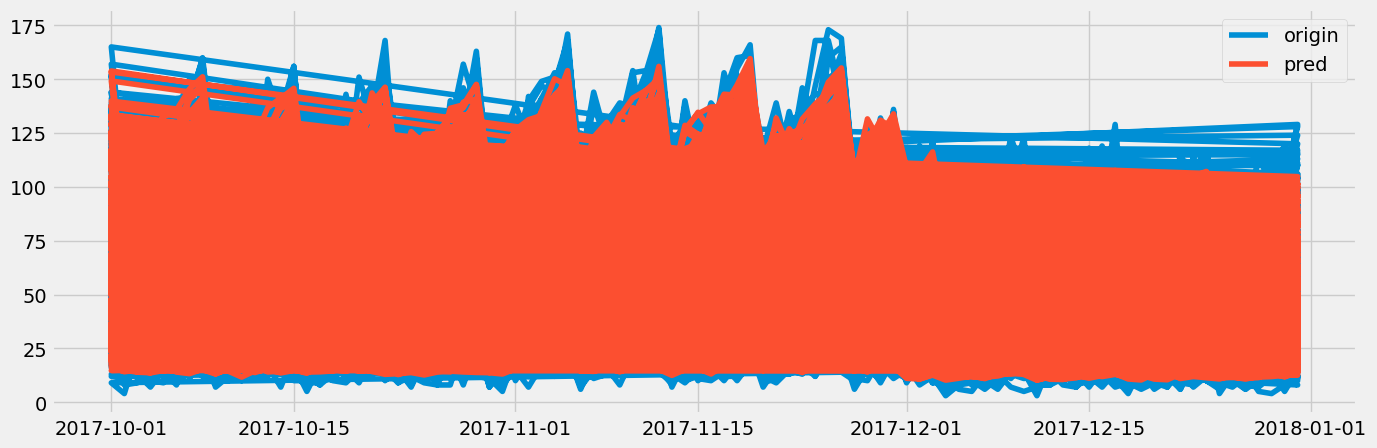

In [553]:

# extract the sales data before october 2017
origin_df = sales[sales['date'] >= '2017-10-01'].loc[:, ['date', 'sales']]
origin_df.set_index('date', inplace=True)


pred_df = sales[sales['date'] >= '2017-10-01'].loc[:, ['date', 'sales']]
pred_df.set_index('date', inplace=True)

# replace the value in sales using the predicted value from catboost

pred_df['sales'] = y_pred_plot


# plot these two dataframes

plt.figure(figsize=(15, 5))
plt.plot(origin_df, label='origin')
plt.plot(pred_df, label='pred')
plt.legend()
